In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the CSV file for volume of production
production_data = pd.read_csv('dataset/Production_volume.csv')

# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()

production_data = pd.melt(production_data, 
                        id_vars=['Croptype', 'Province'],   
                        var_name='Quarter',  
                        value_name='Production') 

# extract the 'Quarter' and 'Year' from the 'Quarter' column
production_data[['Quarter', 'Year']] = production_data['Quarter'].str.extract(r'(Quarter \d) (\d{4})')

In [3]:
production_data.head(10)

,Croptype,Province,Quarter,Production,Year
0,Irrigated Palay,Aklan,Quarter 1,19309,1987
1,Irrigated Palay,Antique,Quarter 1,28275,1987
2,Irrigated Palay,Capiz,Quarter 1,18540,1987
3,Irrigated Palay,Guimaras,Quarter 1,0,1987
4,Irrigated Palay,Iloilo,Quarter 1,58187,1987
5,Rainfed Palay,Aklan,Quarter 1,8130,1987
6,Rainfed Palay,Antique,Quarter 1,3890,1987
7,Rainfed Palay,Capiz,Quarter 1,78750,1987
8,Rainfed Palay,Guimaras,Quarter 1,0,1987
9,Rainfed Palay,Iloilo,Quarter 1,130852,1987


In [4]:
# load the CSV file for volume of production
area_data = pd.read_csv('dataset/Area_harvested.csv')

# fill values for croptype
area_data['Croptype'] = area_data['Croptype'].ffill()

area_data = pd.melt(area_data, 
                        id_vars=['Croptype', 'Province'],   
                        var_name='Quarter',  
                        value_name='Area') 

# extract the 'Quarter' and 'Year' from the 'Quarter' column
area_data[['Quarter', 'Year']] = area_data['Quarter'].str.extract(r'(Quarter \d) (\d{4})')

In [5]:
area_data.head(10)

,Croptype,Province,Quarter,Area,Year
0,Irrigated Palay,Aklan,Quarter 1,6130,1987
1,Irrigated Palay,Antique,Quarter 1,9030,1987
2,Irrigated Palay,Capiz,Quarter 1,6300,1987
3,Irrigated Palay,Guimaras,Quarter 1,0,1987
4,Irrigated Palay,Iloilo,Quarter 1,21270,1987
5,Rainfed Palay,Aklan,Quarter 1,4890,1987
6,Rainfed Palay,Antique,Quarter 1,2590,1987
7,Rainfed Palay,Capiz,Quarter 1,31240,1987
8,Rainfed Palay,Guimaras,Quarter 1,0,1987
9,Rainfed Palay,Iloilo,Quarter 1,60130,1987


In [6]:
yield_data = pd.merge(production_data, area_data, on=['Croptype', 'Province', 'Quarter', 'Year'], how='left')

In [7]:
yield_data.head(10)

,Croptype,Province,Quarter,Production,Year,Area
0,Irrigated Palay,Aklan,Quarter 1,19309,1987,6130
1,Irrigated Palay,Antique,Quarter 1,28275,1987,9030
2,Irrigated Palay,Capiz,Quarter 1,18540,1987,6300
3,Irrigated Palay,Guimaras,Quarter 1,0,1987,0
4,Irrigated Palay,Iloilo,Quarter 1,58187,1987,21270
5,Rainfed Palay,Aklan,Quarter 1,8130,1987,4890
6,Rainfed Palay,Antique,Quarter 1,3890,1987,2590
7,Rainfed Palay,Capiz,Quarter 1,78750,1987,31240
8,Rainfed Palay,Guimaras,Quarter 1,0,1987,0
9,Rainfed Palay,Iloilo,Quarter 1,130852,1987,60130


In [8]:
# Convert columns to numeric (force errors to NaN)
yield_data['Production'] = pd.to_numeric(yield_data['Production'], errors='coerce')
yield_data['Area'] = pd.to_numeric(yield_data['Area'], errors='coerce')

# replace zeroes with NaN for valid imputation (only if you think they are missing data)
yield_data['Production'] = yield_data['Production'].replace(0, pd.NA)
yield_data['Area'] = yield_data['Area'].replace(0, pd.NA)

yield_data.head(5)

,Croptype,Province,Quarter,Production,Year,Area
0,Irrigated Palay,Aklan,Quarter 1,19309.0,1987,6130.0
1,Irrigated Palay,Antique,Quarter 1,28275.0,1987,9030.0
2,Irrigated Palay,Capiz,Quarter 1,18540.0,1987,6300.0
3,Irrigated Palay,Guimaras,Quarter 1,<NA>,1987,<NA>
4,Irrigated Palay,Iloilo,Quarter 1,58187.0,1987,21270.0


In [9]:
# calculate Yield after handling zeroes
yield_data['Yield'] = yield_data['Production'] / yield_data['Area']

# use linear interpolation to handle missing values
yield_data['Yield'] = yield_data['Yield'].interpolate(method='linear')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39424\1603523326.py:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  yield_data['Yield'] = yield_data['Yield'].interpolate(method='linear')


In [10]:
yield_data.head(5)

,Croptype,Province,Quarter,Production,Year,Area,Yield
0,Irrigated Palay,Aklan,Quarter 1,19309.0,1987,6130.0,3.149918
1,Irrigated Palay,Antique,Quarter 1,28275.0,1987,9030.0,3.131229
2,Irrigated Palay,Capiz,Quarter 1,18540.0,1987,6300.0,2.942857
3,Irrigated Palay,Guimaras,Quarter 1,<NA>,1987,<NA>,<NA>
4,Irrigated Palay,Iloilo,Quarter 1,58187.0,1987,21270.0,2.735637


In [11]:
# descriptive statistics
desc_stats = yield_data.describe()

print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,Croptype,Province,Quarter,Production,Year,Area,Yield
count,4620,4620,4500,4171.0,4500,4171.0,4171.0
unique,6,5,4,3260.0,38,2702.0,3570.0
top,Irrigated Palay,Aklan,Quarter 1,9.0,1987,70.0,1.0
freq,770,924,1140,17.0,120,31.0,53.0


In [14]:
aggregated_data = yield_data.groupby(['Croptype', 'Province', 'Quarter', 'Year']).agg(
    total_production=('Production', 'sum'),
    total_area=('Area', 'sum'),
    mean_yield=('Yield', 'mean')
).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head(10)

,Croptype,Province,Quarter,Year,total_production,total_area,mean_yield
0,Corn,Aklan,Quarter 1,1987,47.0,80.0,0.5875
1,Corn,Aklan,Quarter 1,1988,32.0,70.0,0.457143
2,Corn,Aklan,Quarter 1,1989,0,0,NaN
3,Corn,Aklan,Quarter 1,1990,30.0,50.0,0.6
4,Corn,Aklan,Quarter 1,1991,9.0,30.0,0.3
5,Corn,Aklan,Quarter 1,1992,12.0,40.0,0.3
6,Corn,Aklan,Quarter 1,1993,100.0,200.0,0.5
7,Corn,Aklan,Quarter 1,1994,0,0,NaN
8,Corn,Aklan,Quarter 1,1995,222.0,370.0,0.6
9,Corn,Aklan,Quarter 1,1996,212.0,340.0,0.623529


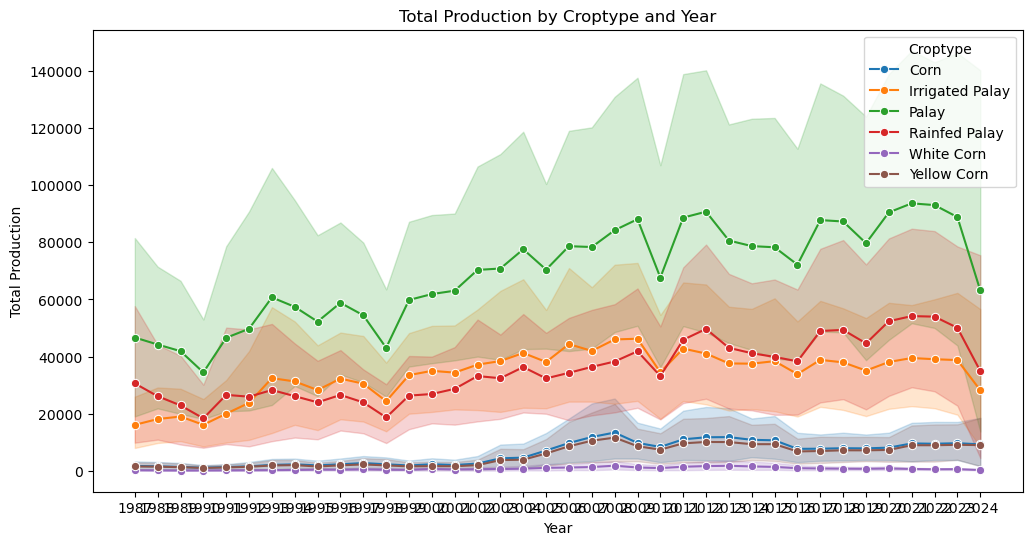

In [15]:
plt.figure(figsize=(12, 6))

# Cceate a line plot of total production over time for each Croptype
sns.lineplot(data=aggregated_data, x='Year', y='total_production', hue='Croptype', marker='o')

plt.title('Total Production by Croptype and Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend(title='Croptype')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_39424\2838749909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aggregated_data, x='Quarter', y='mean_yield', palette='Set2')


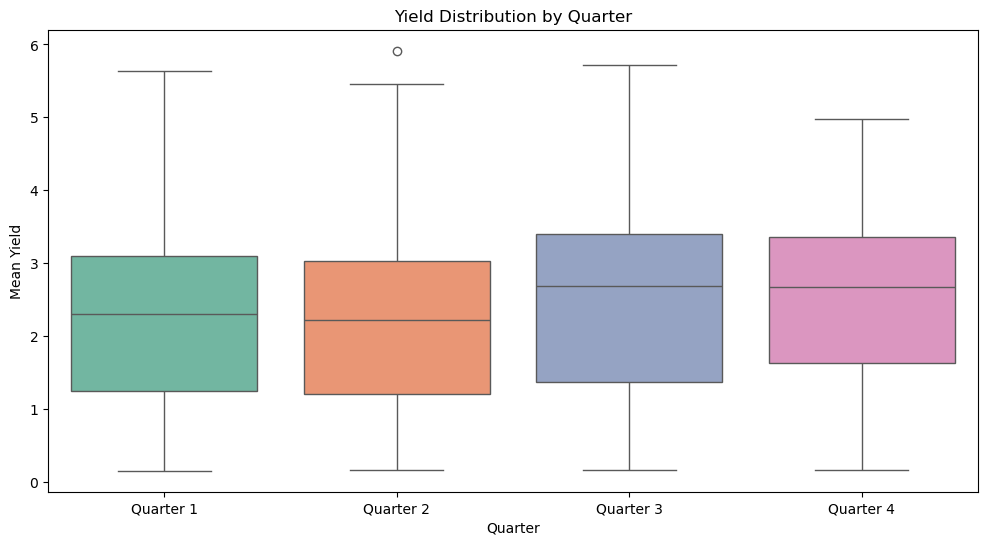

In [16]:
plt.figure(figsize=(12, 6))

# create a boxplot to show the distribution of Yield by Quarter
sns.boxplot(data=aggregated_data, x='Quarter', y='mean_yield', palette='Set2')

plt.title('Yield Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Mean Yield')
plt.show()

In [17]:
# calculate the correlation matrix
correlation_matrix = yield_data[['Production', 'Area', 'Yield']].corr()

# cisualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix: Production, Area, and Yield')
plt.show()

TypeError: float() argument must be a string or a real number, not 'NAType'